In [1]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

Here the data is already put into conversational structure — unlike the bbInterReplyTimingAnalysis notebook. So all the metrics are computed wihtin each conversation and THEN averaged out.

In [2]:
convs=pd.read_csv('../data/bbAllFullConvosAWCorrectTimeZone.csv',sep=';')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (38,39,42,43,46,47,50,51,54,55,58,59,62,63,66,67,70,71,74,75,78,79,82,83,86,87,90,91,94,95,98,99,102,103,106,107,110,111,114,115,118,119,122,123,126,127,130,131,134,135,138,139,142,143,146,147,150,151,154,155,158,159,162,163,166,167,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(convs)

5350

In [5]:
convs['convoLen']=(pd.to_datetime(convs.convoEndTime)-pd.to_datetime(convs.date0)).apply(lambda x: x.value/(10**9))

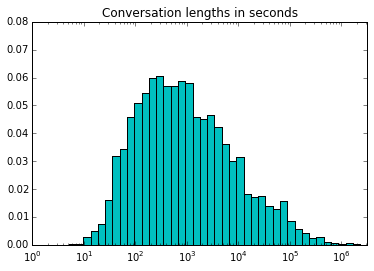

In [6]:
convoLen = convs.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Conversation lengths in seconds')

In [7]:
np.median(convoLen)

733.0

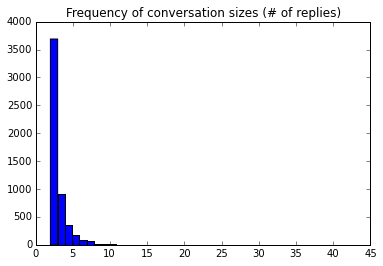

In [8]:
plt.hist(convs.convSize,42)
plt.title('Frequency of conversation sizes (# of replies)')

In [9]:
np.median(convs.convSize)

2.0

In [10]:
np.percentile(convs.convSize, 90)

4.0

In [11]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [12]:
convs['userSetLen']=convs.allNames.apply(lambda x: len(x))

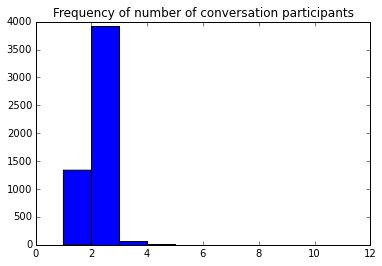

In [13]:
plt.hist(convs.userSetLen,10)
plt.title('Frequency of number of conversation participants')

In [14]:
np.median(convs.userSetLen)

2.0

In [15]:
np.percentile(convs.userSetLen, 90)

2.0

In [16]:
max(convs.userSetLen)

11

### Average time between successive replies whithin a conversation

In [6]:
convs['avgTimePerReply']=convs.convoLen/(convs.convSize-1)

convs.convoLen/(convs.convSize-1) makes it more consistent w/ **repSecDiff** in bbInterReplyTimingAnalysis

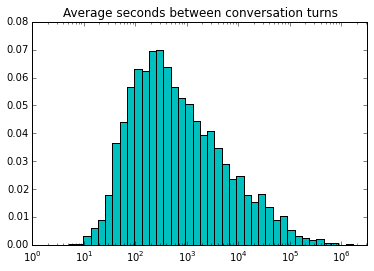

In [18]:
avgTime=convs.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(avgTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(avgTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Average seconds between conversation turns')

In [19]:
np.median(avgTime)

479.5

In [7]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [8]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [9]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [10]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [24]:
len(before)

823

In [25]:
len(during)

2110

In [26]:
len(after)

1418

In [27]:
len(lafter)

930

In [28]:
len(before)+len(during)+len(after)+len(lafter)

5281

69 conversations don't fit these time periods - span more than one

# Before

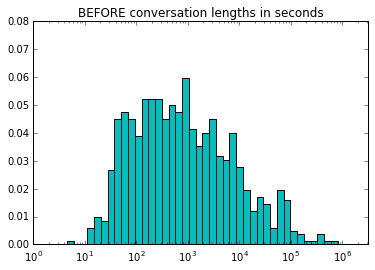

In [12]:
bConvoLen=before.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title(('BEFORE conversation lengths in seconds'))

In [30]:
np.median(bConvoLen)

656.0

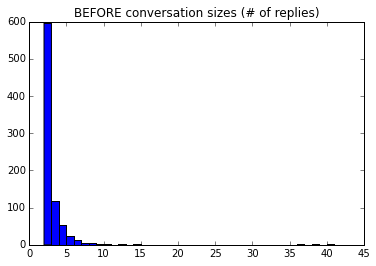

In [31]:
plt.hist(before.convSize.tolist(),39)
plt.title('BEFORE conversation sizes (# of replies)')

In [32]:
np.median(before.convSize)

2.0

In [33]:
np.percentile(before.convSize, 90)

4.0

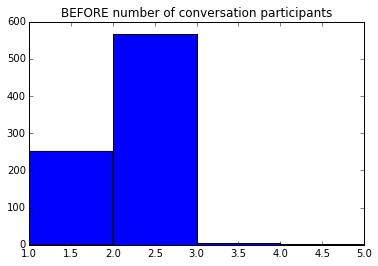

In [34]:
plt.hist(before.userSetLen.tolist(),4)
plt.title('BEFORE number of conversation participants')

In [35]:
np.median(before.userSetLen)

2.0

In [36]:
np.percentile(before.userSetLen, 90)

2.0

In [37]:
max(before.userSetLen)

5

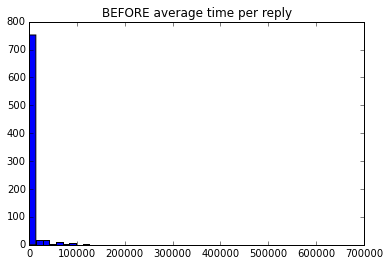

In [38]:
plt.hist(before.avgTimePerReply.tolist(), 50)
plt.title('BEFORE average time per reply')

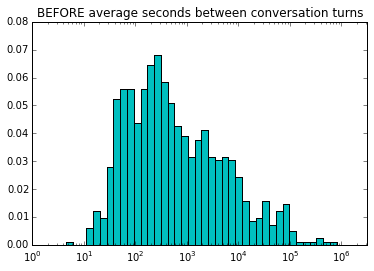

In [39]:
bAvgRepTime=before.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('BEFORE average seconds between conversation turns')

Or should it plot on the loglog? Checked it - not interesting, not high enough

In [40]:
np.median(bAvgRepTime)

394.0

# During

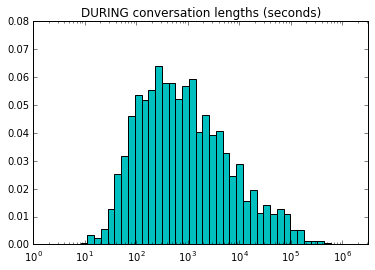

In [13]:
dConvoLen=during.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING conversation lengths (seconds)')

In [42]:
np.median(dConvoLen)

692.5

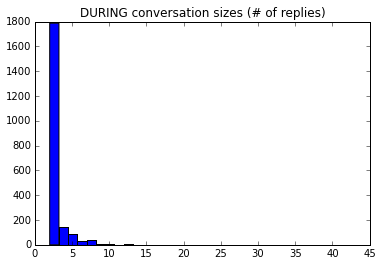

In [43]:
plt.hist(during.convSize.tolist(),33)
plt.title('DURING conversation sizes (# of replies)')

In [44]:
np.median(during.convSize)

2.0

In [45]:
np.percentile(during.convSize, 90)

4.0

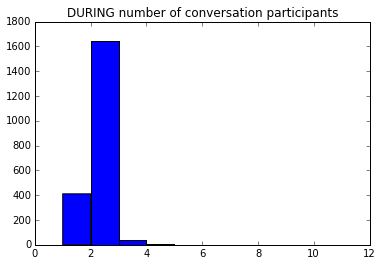

In [46]:
plt.hist(during.userSetLen.tolist(),10)
plt.title('DURING number of conversation participants')

In [47]:
np.median(during.userSetLen)

2.0

In [48]:
np.percentile(during.userSetLen,90)

2.0

In [49]:
max(during.userSetLen)

11

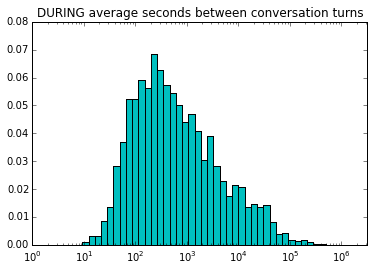

In [50]:
dAvgRepTime=during.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING average seconds between conversation turns')

In [51]:
np.median(dAvgRepTime)

456.5

Represent the medians for the convoLen and avgReplyTime as boxplots? This is local only, include both local and global?

# After

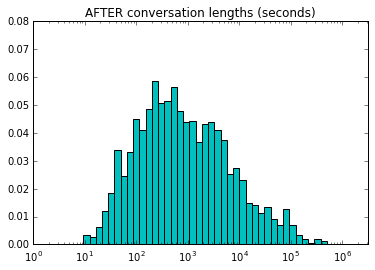

In [14]:
aConvoLen=after.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER conversation lengths (seconds)')

In [53]:
np.median(aConvoLen)

664.5

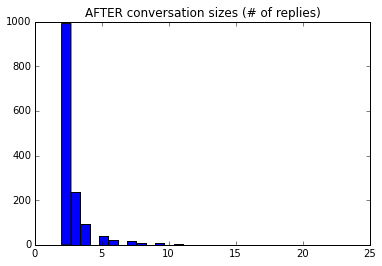

In [54]:
plt.hist(after.convSize.tolist(),33)
plt.title('AFTER conversation sizes (# of replies)')

In [55]:
np.median(after.convSize.tolist())

2.0

In [56]:
np.percentile(after.convSize, 90)

4.0

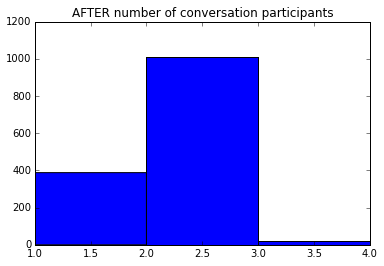

In [57]:
plt.hist(after.userSetLen.tolist(),3)
plt.title('AFTER number of conversation participants')

In [58]:
np.median(after.userSetLen)

2.0

In [59]:
np.percentile(after.userSetLen, 90)

2.0

In [60]:
max(after.userSetLen)

4

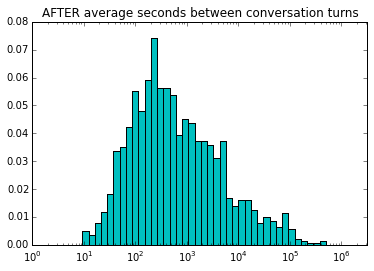

In [61]:
aAvgRepTime=after.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER average seconds between conversation turns')

In [62]:
np.median(aAvgRepTime)

453.0

# Long after

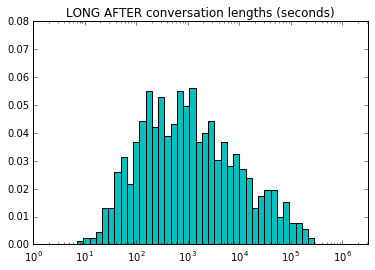

In [15]:
laConvoLen=lafter.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(laConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('LONG AFTER conversation lengths (seconds)')

In [64]:
np.median(laConvoLen)

900.0

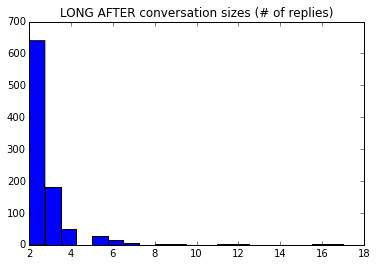

In [65]:
plt.hist(lafter.convSize.tolist() ,20)
plt.title('LONG AFTER conversation sizes (# of replies)')

In [66]:
np.median(after.convSize.tolist())

2.0

In [67]:
np.percentile(after.convSize, 90)

4.0

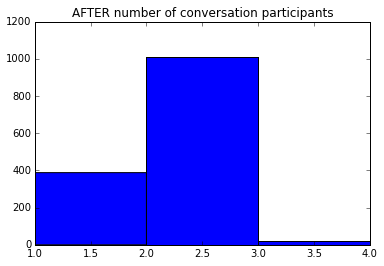

In [68]:
plt.hist(after.userSetLen.tolist(),3)
plt.title('AFTER number of conversation participants')

In [69]:
np.median(after.userSetLen)

2.0

In [70]:
np.percentile(after.userSetLen, 90)

2.0

In [71]:
max(after.userSetLen)

4

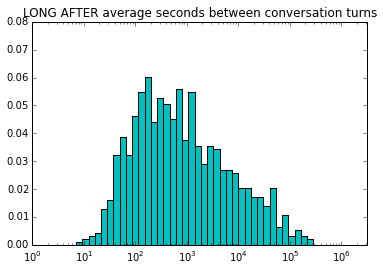

In [72]:
laAvgRepTime=lafter.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(laAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('LONG AFTER average seconds between conversation turns')

In [73]:
np.median(laAvgRepTime)

631.5

In [16]:
st.kruskal(bConvoLen,dConvoLen,aConvoLen,laConvoLen)

KruskalResult(statistic=11.406415074146848, pvalue=0.009719495823950805)

In [17]:
import Dunn

In [25]:
Dunn.kw_dunn([bConvoLen, dConvoLen, aConvoLen, laConvoLen], [(0,1),(0,2),(0,3)], alpha=0.05, method='hs')

/home/mako0970/ReplyPaperNew/code/Dunn.py:106: UserWarning: We see ties.
  warnings.warn("We see ties.")


(11.406415074146848,
 0.009719495823950805,
 array([ 1.04849502,  0.74493836,  3.08212239]),
 array([ 0.50214359,  0.50214359,  0.00615325]),
 array([False, False,  True], dtype=bool))

**Important points:**
* the medians of average between-reply times w/in conversations are higher than median of inter-reply times in general
* this is because inter-reply times distrbiution is quite skewed and long-tailed, so averaging icorporates more of those bigger values
* the question is then: are inter-reply times w/in each conversation also skewed and long-tailed? Or does each conversation has a somehwat consistent temporal rhythm/signature?
* to investigate this, calculate the  median, sd, and range of inter-reply time
* for the branching conversations, only do that for consequitive segments
* Not stat sig

# Further within conversation analysis

In [85]:
convs['longTailed']=0 

In [100]:
#made-up: max - median (2nd 50% of dist) is more than twice the median (1st 50% of dist)
def longTailed(row):
    timeDiff=[]
    for i in range(1,44): #start from one b/c subtracting the previous tweet's time
        colName='date'+str(i)
        if str(row[colName])!='0':
            if ((pd.to_datetime(row[colName])>pd.to_datetime(row['date'+str(i-1)]))):#for branching convos!!!!
                t=(pd.to_datetime(row[colName])-pd.to_datetime(row['date'+str(i-1)])).seconds
                timeDiff.append(t)
    if len(timeDiff)>0:
        lt=np.median(timeDiff) < 2*(max(timeDiff)-np.median(timeDiff))
    else:
        lt=np.nan
    return lt

In [101]:
convs.longTailed=convs.apply(longTailed, axis=1)

In [106]:
len(convs[convs.longTailed==True])/float(len(convs))

0.21364485981308412

In [107]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [108]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [109]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [110]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [111]:
sum(before.longTailed)/float(len(before))

0.18469015795868773

In [113]:
sum(during.longTailed.dropna())/float(len(during))

0.22417061611374409

In [114]:
sum(after.longTailed)/float(len(after))

0.20874471086036672

In [115]:
sum(lafter.longTailed)/float(len(lafter))

0.21182795698924731

**Takeway:**
* so there is no differnce DO CHI-SQUARE
* that means that the difference in average inter-reply time is not because more convos during have long-tailed dists
* this must mean that during all the tweets in the convos are longer (both short and very long reply times)

In [116]:
convs['medianReplyTime']=0

In [118]:
def medRep(row):
    timeDiff=[]
    for i in range(1,44): #start from one b/c subtracting the previous tweet's time
        colName='date'+str(i)
        if str(row[colName])!='0':
            if ((pd.to_datetime(row[colName])>pd.to_datetime(row['date'+str(i-1)]))):#for branching convos!!!!
                t=(pd.to_datetime(row[colName])-pd.to_datetime(row['date'+str(i-1)])).seconds
                timeDiff.append(t)
    if len(timeDiff)>0:
        lt=np.median(timeDiff)
    else:
        lt=np.nan
    return lt

In [119]:
convs['medianReplyTime']=convs.apply(medRep, axis=1)

In [121]:
np.median(convs.medianReplyTime.dropna())

442.0

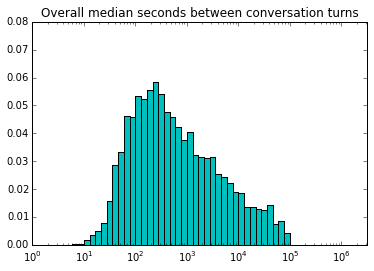

In [122]:
medRepTime=convs.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Overall median seconds between conversation turns')

In [123]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [124]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [125]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [126]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-24 00:00:00'))]

In [127]:
np.median(before.medianReplyTime.dropna())

381.0

In [128]:
np.median(during.medianReplyTime.dropna())

413.0

In [129]:
np.median(after.medianReplyTime.dropna())

411.0

In [130]:
np.median(lafter.medianReplyTime.dropna())

545.5

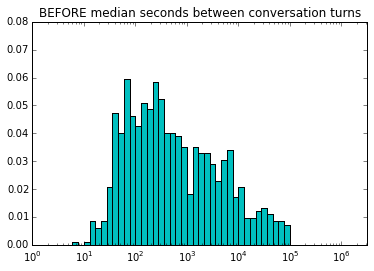

In [131]:
bMedRepTime=before.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('BEFORE median seconds between conversation turns')

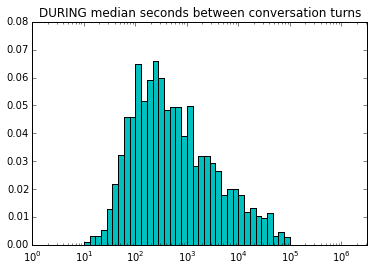

In [132]:
dMedRepTime=during.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING median seconds between conversation turns')

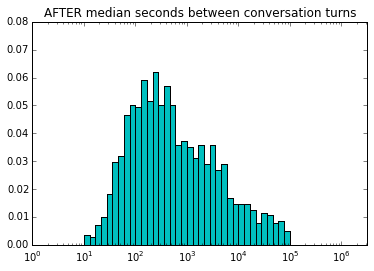

In [133]:
aMedRepTime=after.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER median seconds between conversation turns')

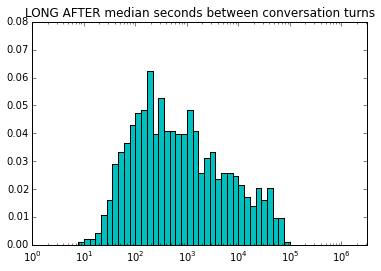

In [134]:
laMedRepTime=lafter.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(laMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(laMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('LONG AFTER median seconds between conversation turns')

In [135]:
st.kruskal(bMedRepTime,dMedRepTime,aMedRepTime,laMedRepTime)

(11.735973151221748, 0.0083445648558176534)

In [136]:
st.ranksums(bMedRepTime,dMedRepTime)

(-1.0179160578693829, 0.30871784972083716)

In [137]:
st.ranksums(bMedRepTime,laMedRepTime)

(-2.9032129817234638, 0.0036935535617031142)

In [138]:
st.ranksums(dMedRepTime, laMedRepTime)

(-2.8112925482504489, 0.0049342898751006652)

# Branching

In [139]:
sum(convs.branching)/float(len(convs))

0.060373831775700937

In [140]:
sum(before.branching)/float(len(before))

0.041312272174969626

In [141]:
sum(during.branching)/float(len(during))

0.069194312796208537

In [142]:
sum(after.branching)/float(len(after))

0.062059238363892807

In [143]:
sum(lafter.branching)/float(len(lafter))

0.049462365591397849

**Takeway:**
* So there are slightly more branching conversations during and after than before and lafter
* Is this because more people are involved? NO!!!
* We show above that in all time periods median number of people in convos is 2
* Although during has a higher maximum # of users in a convo (5, 11, 4 respectively)

In [144]:
convs.to_csv('../data/bbAllFullConvosMoreAWCorrectTimeZone.csv',sep=';', index=False)